## Отчет по лабораторной работе C1123

Для генерации написал скрипт на Python. Генераторы в качестве параметра принимают распределение pi:
1. prefixsumgenerator - генератор, использующий префиксные суммы (как параметр можно передавать флаг использовать ли бинарный поиск)
+ rectfillgenerator - генератор, реализующий метод с заполнением прямоугольника

Функция processgenerator используется для тестирования (подсчитывает распределение и время работы)

In [1]:
import numpy as np
import random as rnd
import bisect as bsct
import itertools
import time
import math

class prefixsumgenerator():

    def __init__(self, distr, usebinsearch = False):
        self.distr = distr
        self.size = len(distr)
        self.usebinsearch = usebinsearch

        self.cumsum = np.cumsum(distr)
        pass

    def getsize(self):
        return self.size

    def gennext(self):

        brv = rnd.random()
        result = -1

        if self.usebinsearch:
            result = bsct.bisect_left(self.cumsum, brv) + 1
        else:
            for i in xrange(0, self.size):
                if brv < self.cumsum[i]:
                    result = i + 1
                    break
        return result

class rectfillgenerator():

    def __init__(self, distr):
        self.distr = distr
        self.size = len(distr)
        self.rects = list()

        self.onedivn = 1. / self.size

        i = 0
        distrsortnum = list(sorted(itertools.izip(distr, xrange(1, self.size + 1))))

        while len(distrsortnum) > 0:

            p1 = distrsortnum.pop(0)
            if len(distrsortnum) > 0:
                pn = distrsortnum.pop()

                pnnew = (pn[0] - (self.onedivn - p1[0]), pn[1])

                bsct.insort_left(distrsortnum, pnnew)

                self.rects.append((p1[0], p1[1], pn[1]))
            else:
                self.rects.append((self.onedivn, p1[1], p1[1]))

        pass

    def getsize(self):
        return self.size

    def gennext(self):

        brv1 = rnd.randint(0, self.size - 1)
        brv2 = rnd.uniform(0, self.onedivn)

        result = -1

        if brv2 <= self.rects[brv1][0]:
            result = self.rects[brv1][1]
        else:
            result = self.rects[brv1][2]

        return result

def processgenerator(generator, count):
    testdistr = list()
    tstart = time.clock()
    for i in xrange(count):
        testdistr.append(generator.gennext())
    timing = time.clock() - tstart

    return testdistr, timing

Для тестирования сгенерировал 4 распределения с количеством исходов равным 500, генерировать буду по 500 000 случайных величин.

In [2]:
N = 500
M = 500000
distrs = list()
distrs.append(list(x for x in xrange(1, N + 1)))
distrs.append(list(N + 1 - x for x in xrange(1, N + 1)))
distrs.append(list(math.log(x) for x in xrange(1, N + 1)))
distrs.append(list(abs(math.pi * math.sin(x) / 10.) for x in xrange(1, N + 1)))

# normalization
for i in xrange(len(distrs)):
    dsum = sum(distrs[i])
    norm = [x / (1.0 * dsum) for x in distrs[i]]
    distrs[i] = norm

In [3]:
results = [[], [], []]
for d in distrs:
    gen = prefixsumgenerator(d)
    results[0].append(processgenerator(gen, M))

for d in distrs:
    gen = prefixsumgenerator(d, True)
    results[1].append(processgenerator(gen, M))
                                               
for d in distrs:
    gen = rectfillgenerator(d)
    results[2].append(processgenerator(gen, M))

Ниже приведены полученные гистограммы.

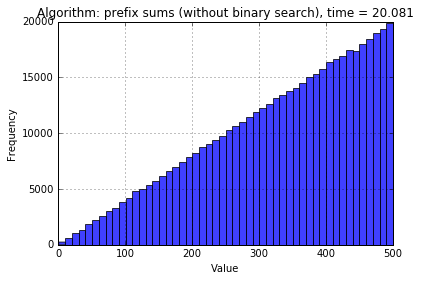

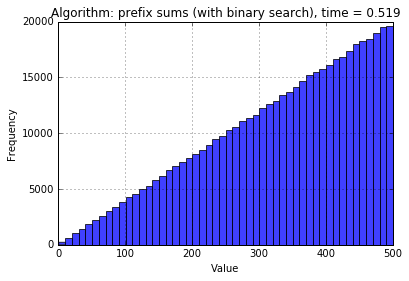

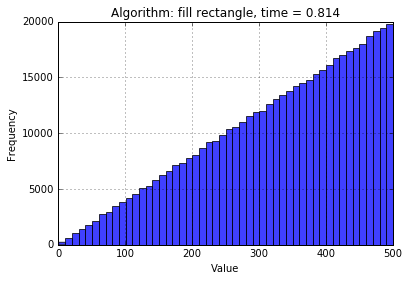

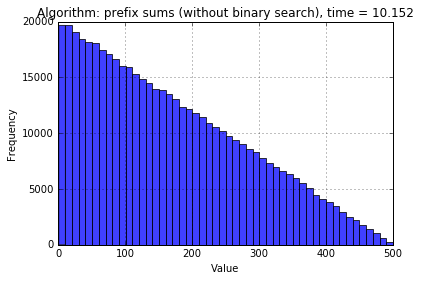

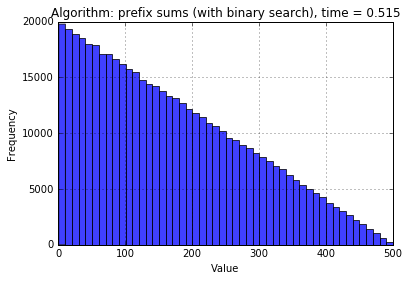

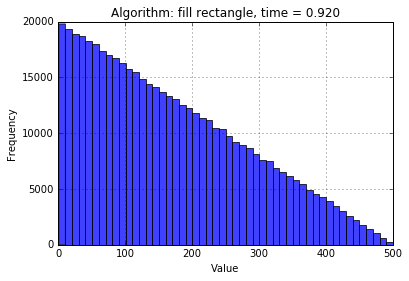

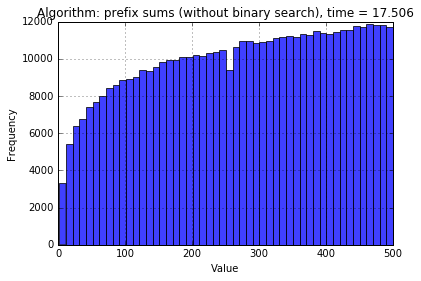

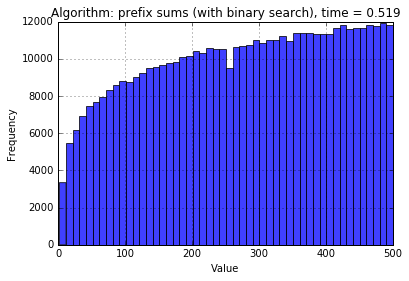

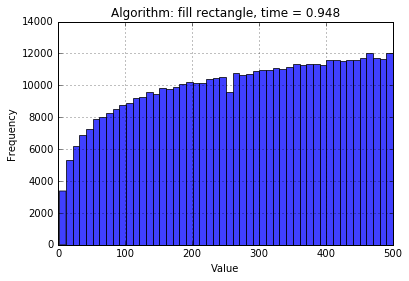

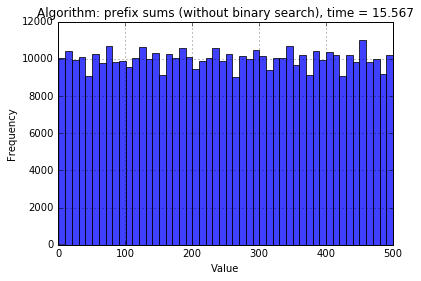

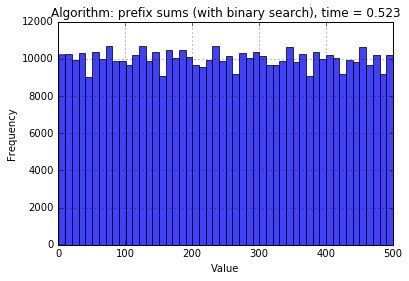

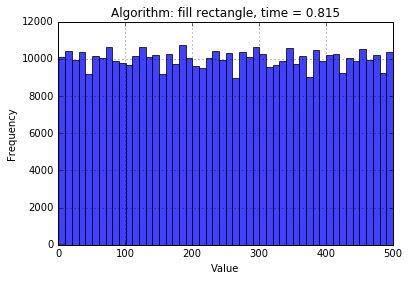

In [4]:
%matplotlib inline
import matplotlib.pyplot as pyplot

def drawhistogram(title, result):
    pyplot.title(title)
    pyplot.hist(result, bins=50, alpha=0.75)
    pyplot.xlabel("Value")
    pyplot.ylabel("Frequency")

    pyplot.grid(True)
    
    pyplot.show()

names = ["prefix sums (without binary search)", "prefix sums (with binary search)", "fill rectangle"]
for i in xrange(4):
    for j in xrange(3):
        drawhistogram("Algorithm: {0}, time = {1:.3f}".format(names[j], results[j][i][1]), results[j][i][0])

### Выводы:
* 
* 